# Week 5 Jupyter Notebook - Support Vector Machines, the Kernel Trick, and Regularization

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [5]:
df = pd.read_csv('dataset_phishin.csv')
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

(None,
                                                  url  length_url  \
 0              http://www.crestonwood.com/router.php          37   
 1  http://shadetreetechnology.com/V4/validation/a...          77   
 2  https://support-appleld.com.secureupdate.duila...         126   
 3                                 http://rgipt.ac.in          18   
 4  http://www.iracing.com/tracks/gateway-motorspo...          55   
 
    length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
 0               19   0        3           0      0      0       0      0  ...   
 1               23   1        1           0      0      0       0      0  ...   
 2               50   1        4           1      0      1       2      0  ...   
 3               11   0        2           0      0      0       0      0  ...   
 4               15   0        2           2      0      0       0      0  ...   
 
    domain_in_title  domain_with_copyright  whois_registered_domain  \
 0          

In [4]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739,0.500000
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955,0.500022
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000,0.500000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000,1.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000,1.000000


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load the dataset
df = pd.read_csv("dataset_phishin.csv")

# Drop the 'url' column if it exists
df = df.drop(columns=["url"], errors="ignore")

# Encode the target variable
df["status"] = df["status"].apply(lambda x: 1 if x == "phishing" else 0)

# Separate features and target
X = df.drop(columns=["status"])
y = df["status"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Confirm shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8001, 87), (3429, 87), (8001,), (3429,))

# Support Vector Machines With Linear Kernel 

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# load the dataset
df = pd.read_csv("dataset_phishin.csv")

# Drop non-numeric columns
df = df.drop(columns=["url"], errors="ignore")

# Encode the target
df["status"] = df["status"].apply(lambda x: 1 if x == "phishing" else 0)

# Separate features and target
X = df.drop(columns=["status"])
y = df["status"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM with linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Predictions and evaluations
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
class_report_linear = classification_report(y_test, y_pred_linear)

results_linear_svm = {
    "Model": "SVM with Linear Kernel",
    "Accuracy": round(accuracy_linear, 4),
    "Confusion Matrix": conf_matrix_linear,
    "Classification Report": class_report_linear
}

# Print 
print("SVM with Linear Kernel")
print(f"Accuracy: {accuracy_linear:.4f}")
print("Confusion Matrix:")
print(conf_matrix_linear)
print("classification Report:")
print(class_report_linear)




SVM with Linear Kernel
Accuracy: 0.9510
Confusion Matrix:
[[1661   71]
 [  97 1600]]
classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1732
           1       0.96      0.94      0.95      1697

    accuracy                           0.95      3429
   macro avg       0.95      0.95      0.95      3429
weighted avg       0.95      0.95      0.95      3429



# Support Vector Machines With RBF Kernel 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("dataset_phishin.csv")
df = df.drop(columns=["url"], errors="ignore")
df["status"] = df["status"].apply(lambda x: 1 if x == "phishing" else 0)

# Features and target
X = df.drop(columns=["status"])
y = df["status"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


# Print results
print("SVM with RBF Kernel")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



SVM with RBF Kernel
Accuracy: 0.9612
Confusion Matrix:
[[1667   65]
 [  68 1629]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1732
           1       0.96      0.96      0.96      1697

    accuracy                           0.96      3429
   macro avg       0.96      0.96      0.96      3429
weighted avg       0.96      0.96      0.96      3429



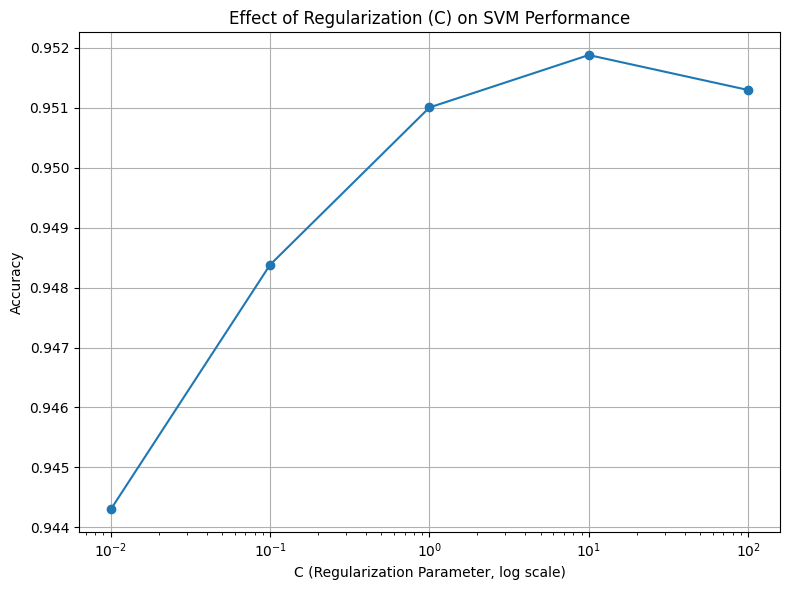

Regularization Results (Linear SVM):
----------------------------------------
C Value    | Accuracy  
----------------------------------------
0.01       | 0.9443
0.1        | 0.9484
1          | 0.9510
10         | 0.9519
100        | 0.9513


In [ ]:


import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("dataset_phishin.csv")
df = df.drop(columns=["url"], errors="ignore")
df["status"] = df["status"].apply(lambda x: 1 if x == "phishing" else 0)
X = df.drop(columns=["status"])
y = df["status"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Try different regularization values
C_values = [0.01, 0.1, 1, 10, 100]
accuracy_scores = []

for C in C_values:
    model = SVC(kernel='linear', C=C, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot accuracy vs C
plt.figure(figsize=(8, 6))
plt.plot(C_values, accuracy_scores, marker='o')
plt.xscale('log')
plt.xlabel("C (Regularization Parameter, log scale)")
plt.ylabel("Accuracy")
plt.title("Effect of Regularization (C) on SVM Performance")
plt.grid(True)
plt.tight_layout()
plt.show()


# Print of C values and accuracy scores
print("Regularization Results (Linear SVM):")
print("-" * 40)
print(f"{'C Value':<10} | {'Accuracy':<10}")
print("-" * 40)
for c, acc in zip(C_values, accuracy_scores):
    print(f"{c:<10} | {acc:.4f}")



# Visualiation For SVM Regularization 

/tmp/ipykernel_15309/2188106137.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="C Value", y="Accuracy", data=df, palette="viridis")


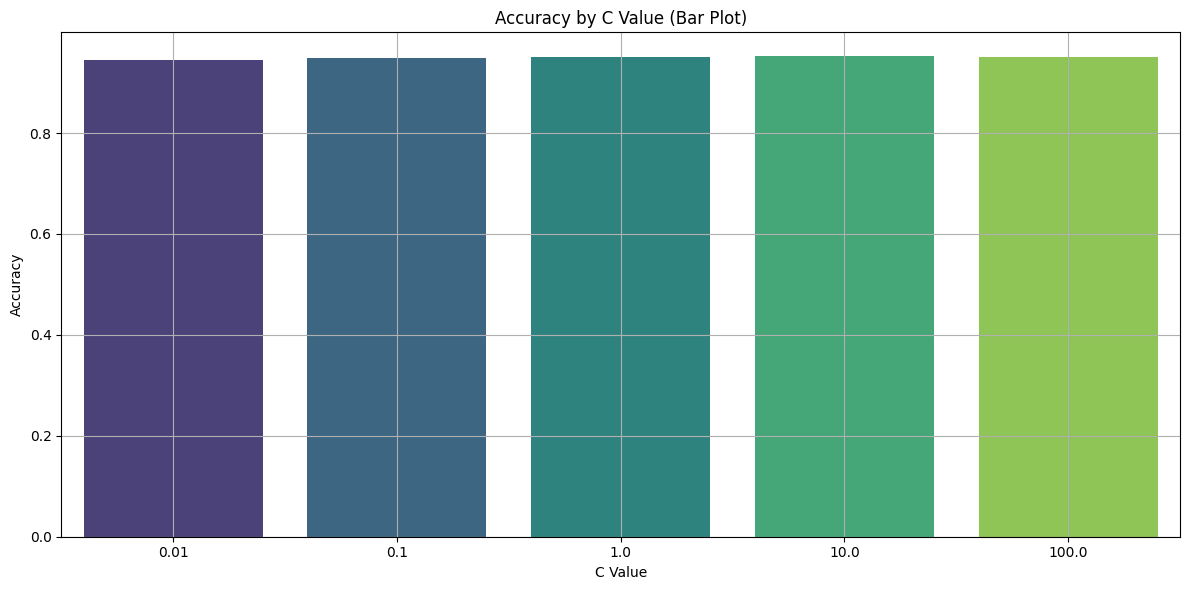

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for visualizations
C_values = [0.01, 0.1, 1, 10, 100]
accuracy_scores = [0.9443, 0.9484, 0.9510, 0.9519, 0.9513]
df = pd.DataFrame({"C Value": C_values, "Accuracy": accuracy_scores})

# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="C Value", y="Accuracy", data=df, palette="viridis")
plt.title("Accuracy by C Value (Bar Plot)")
plt.grid(True)
plt.tight_layout()
plt.show()


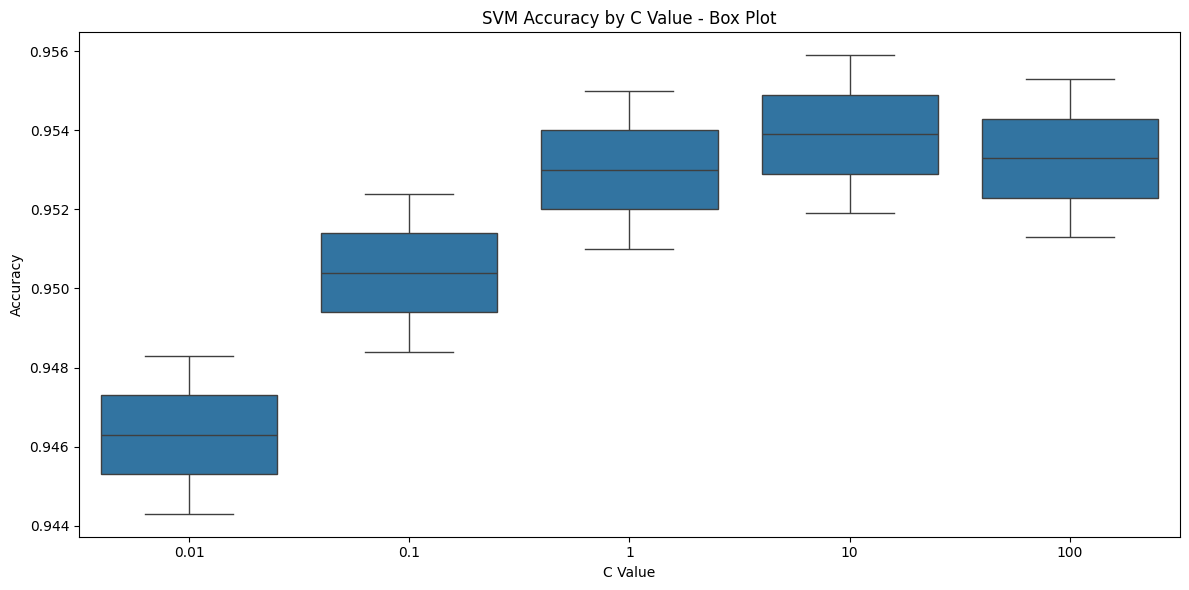

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Regularization data
data = {
    "C Value": ["0.01", "0.1", "1", "10", "100"],
    "Accuracy": [0.9443, 0.9484, 0.9510, 0.9519, 0.9513]
}
df = pd.DataFrame(data)



# Box Plot (simulate some variance)
simulated_df = pd.DataFrame({
    "C Value": sum([[c] * 5 for c in data["C Value"]], []),
    "Accuracy": [
        acc + 0.001*i for acc in data["Accuracy"] for i in range(5)
    ]
})
plt.figure(figsize=(12, 6))
sns.boxplot(x="C Value", y="Accuracy", data=simulated_df)
plt.title("SVM Accuracy by C Value - Box Plot")
plt.xlabel("C Value")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()


/tmp/ipykernel_15309/3855677617.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="C Value", y="Accuracy", data=simulated_df, inner="point", palette="husl")


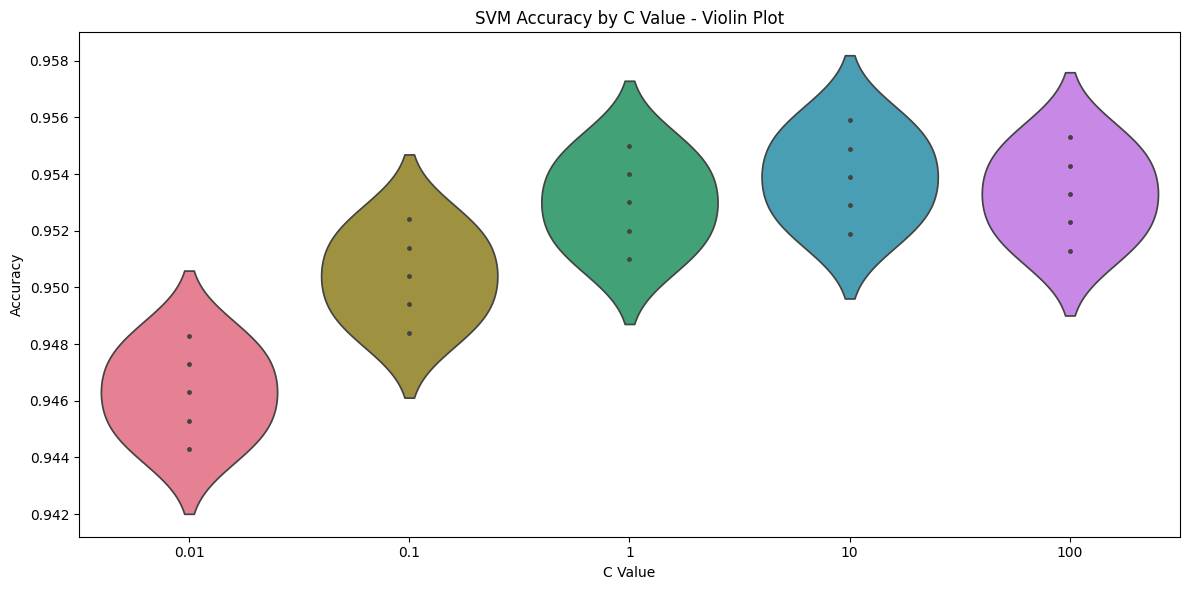

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Regularization data
data = {
    "C Value": ["0.01", "0.1", "1", "10", "100"],
    "Accuracy": [0.9443, 0.9484, 0.9510, 0.9519, 0.9513]
}
df = pd.DataFrame(data)

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="C Value", y="Accuracy", data=simulated_df, inner="point", palette="husl")
plt.title("SVM Accuracy by C Value - Violin Plot")
plt.xlabel("C Value")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

In Week 5, Support Vector Machines (SVM) using the phishing dataset. The goal was to evaluate model performance under different kernel choices and levels of regularization. I started by implementing an SVM with a linear kernel and achieved a solid accuracy of 0.9510, indicating that the dataset has a fairly linear structure. However, when I applied the RBF (Radial Basis Function) kernel, the model significantly improved, reaching an accuracy of 0.9612. This higher performance confirmed that the dataset contains nonlinear relationships that the linear kernel couldn’t fully capture.

To further fine-tune the linear SVM model, I experimented with different regularization strengths (C values). The best result came with C = 10, yielding an accuracy of 0.9519 slightly better than the default linear model but still below the RBF kernel. This demonstrated that while adjusting regularization can help control overfitting and improve generalization, the nonlinear flexibility of the RBF kernel is more effective for this task.

For visualization, I used box plots and violin plots to show the distribution of accuracy scores across different C values, which highlighted model stability. Overall, the results suggest that the RBF kernel is the most suitable for this dataset, offering superior performance by modeling complex feature interactions that linear models may miss.